In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('HousingData.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['date'] = pd.to_datetime(data['date'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [8]:
data['price']     = data['price'].astype('int64')
data['bedrooms']  = data['bedrooms'].astype('int64')
data['floors']    = data['floors'].astype('int64')
data['street']    = data['street'].astype('string')
data['city']      = data['city'].astype('string')
data['statezip']  = data['statezip'].astype('string')
data['country']   = data['country'].astype('string')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   int64         
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int64         
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   string        
 15  city           4600 n

In [10]:
data.insert(1, "year", data.date.dt.year)
data

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,2014,308166,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,2014,534333,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,2014,416904,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2014,203400,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [11]:
data['year'].nunique()

1

In [12]:
(data.price == 0).sum()

49

In [13]:
data['price'].replace(0, np.nan, inplace = True)
data.dropna(inplace=True)

In [14]:
(data.price == 0).sum()

0

In [15]:
data['age'] = data['year'] - data['yr_built']

In [16]:
# Remove outliers:
(data['price'] > 0.3e7).sum()

9

In [17]:
# Remove outliers:
data = data[~(data['price'] > 0.3e7)]

In [18]:
(data['price'] > 0.3e7).sum()

0

In [19]:
data['price'] = np.log1p(data['price'])

<ipython-input-19-c905a4334c77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = np.log1p(data['price'])


In [20]:
X = pd.get_dummies(data.city, prefix='City')

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
data['city_pca1'] = X_pca[:, 0]
data['city_pca2'] = X_pca[:, 1]

<ipython-input-21-226b339a0b21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city_pca1'] = X_pca[:, 0]
<ipython-input-21-226b339a0b21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city_pca2'] = X_pca[:, 1]


In [22]:
df = data.drop(['date', 'street', 'statezip', 'country','year','city','age'], axis = 1)

In [23]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,-0.335753,-0.024718
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,0.673959,0.003173
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,-0.358174,-0.039214
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,-0.401021,-0.577245
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,-0.380177,-0.079198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,12.638397,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,0.673959,0.003173
4596,13.188776,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,-0.401021,-0.577245
4597,12.940614,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,-0.407109,0.807328
4598,12.222935,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,0.673959,0.003173


In [24]:
x = df.drop("price", axis=1)
y = pd.DataFrame(df["price"])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [26]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = x.columns)
X_train.head(10)

<IPython.core.display.Javascript object>

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,0.683861,0.136259,0.193309,-0.254098,0.986643,-0.07982,-0.300112,0.831332,0.373270,-0.296371,-0.435998,1.196239,1.408534,0.028427
1,0.683861,-0.192664,-0.036875,-0.029374,-0.835662,-0.07982,-0.300112,-0.663091,-0.929137,1.639831,-0.705847,1.229981,1.408534,0.028427
2,0.683861,0.465183,0.039853,-0.200313,0.986643,-0.07982,-0.300112,-0.663091,0.409448,-0.674710,1.149365,-0.820075,-0.821927,3.264612
3,0.683861,0.465183,1.135968,-0.201029,0.986643,-0.07982,-0.300112,-0.663091,1.615380,-0.674710,1.183097,-0.820075,-0.821927,3.264612
4,0.683861,-1.508360,-0.278020,-0.271007,-0.835662,-0.07982,-0.300112,-3.651939,0.059727,-0.674710,-2.358672,-0.820075,1.408534,0.028427
5,0.683861,0.465183,0.270037,-0.126038,-0.835662,-0.07982,3.688820,-0.663091,0.204439,0.170988,0.204894,1.228958,1.408534,0.028427
6,0.683861,0.136259,-0.321865,-0.174095,-0.835662,-0.07982,-0.300112,0.831332,-0.591476,0.438050,-1.380470,-0.820075,1.408534,0.028427
7,-1.539377,-1.508360,-1.396057,-0.307800,-0.835662,-0.07982,2.359176,0.831332,-1.170324,-0.674710,-1.582856,-0.820075,1.408534,0.028427
8,-0.427758,-0.521588,-0.453399,-0.169220,-0.835662,-0.07982,-0.300112,-0.663091,-0.700010,0.371284,0.204894,1.228958,1.408534,0.028427
9,1.795480,3.096574,1.859403,-0.180594,0.986643,-0.07982,-0.300112,-0.663091,2.411296,-0.674710,1.250559,-0.820075,-0.711225,-0.125690


In [27]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = x.columns)
X_test.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,0.683861,1.780878,1.804598,-0.263737,0.986643,-0.07982,-0.300112,-0.663091,1.265660,1.328258,1.452946,-0.820075,1.408534,0.028427
1,-0.427758,-0.192664,0.445415,-0.252721,-0.835662,-0.07982,-0.300112,0.831332,-0.482942,1.795617,-2.190017,1.214643,1.408534,0.028427
2,-0.427758,-0.521588,-0.968573,-0.194887,-0.835662,-0.07982,-0.300112,-0.663091,-0.700010,-0.674710,0.542205,1.224868,-0.724270,-0.148528
3,1.795480,0.465183,0.609833,0.060598,-0.835662,-0.07982,-0.300112,0.831332,-0.229696,1.662086,-1.717781,-0.820075,1.408534,0.028427
4,0.683861,-0.192664,0.193309,-0.094726,-0.835662,-0.07982,-0.300112,0.831332,0.578278,-0.674710,-0.537191,1.234070,-0.809367,-2.307364
5,0.683861,0.465183,0.039853,0.635351,0.986643,-0.07982,-0.300112,-0.663091,0.409448,-0.674710,0.677130,-0.820075,-0.720965,-0.142150
6,-0.427758,-0.850512,-0.091681,-0.156883,-0.835662,-0.07982,-0.300112,-0.663091,-0.579417,0.883154,-0.267342,1.233048,1.408534,0.028427
7,0.683861,0.465183,1.179812,-0.175747,0.986643,-0.07982,-0.300112,-0.663091,1.663618,-0.674710,1.183097,-0.820075,-0.655044,-0.072498
8,-0.427758,-0.192664,-0.212253,-0.179052,-0.835662,-0.07982,-0.300112,0.831332,-0.362349,0.237753,-0.064955,-0.820075,-0.690979,-0.099582
9,-0.427758,1.451955,-0.530127,-0.355251,2.808947,-0.07982,-0.300112,-0.663091,-0.217637,-0.674710,1.216828,-0.820075,1.408534,0.028427


Linear Regresion

In [28]:
from sklearn.metrics import accuracy_score

modellr = LinearRegression()
modellr.fit(X_train, Y_train)

y_predictionlr = modellr.predict(X_test)

accuracy = modellr.score(X_test, Y_test)


# accuracy = accuracy_score(Y_test, y_prediction)
print(accuracy)

0.5347971587308051


In [29]:
mselr = mean_squared_error(Y_test, y_predictionlr)
rmselr = mean_squared_error(Y_test, y_predictionlr, squared=False)
maelr = mean_absolute_error(Y_test, y_predictionlr)
r2lr = r2_score(Y_test, y_predictionlr)

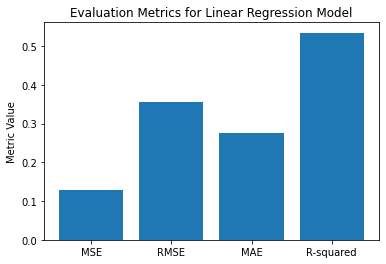

In [30]:
metrics = ['MSE', 'RMSE', 'MAE', 'R-squared']
values = [mselr, rmselr, maelr, r2lr]
plt.bar(metrics, values)
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics for Linear Regression Model')
plt.show()

Decision Tree:

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeRegressor(max_depth=7)
decision_tree.fit(X_train, Y_train)
y_predictiondt = decision_tree.predict(X_test)
accuracydt = decision_tree.score(X_test, Y_test)
# accuracydt = accuracy_score(Y_test, y_prediction)
print(accuracydt)

0.6154725993838139


In [32]:
msedt = mean_squared_error(Y_test, y_predictiondt)
rmsedt = mean_squared_error(Y_test, y_predictiondt, squared=False)
maedt = mean_absolute_error(Y_test, y_predictiondt)
r2dt = r2_score(Y_test, y_predictiondt)

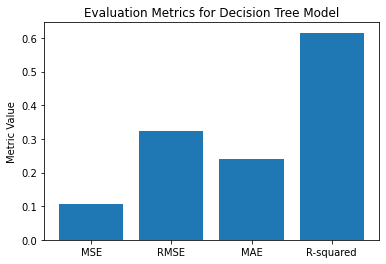

In [33]:
metrics = ['MSE', 'RMSE', 'MAE', 'R-squared']
values = [msedt, rmsedt, maedt, r2dt]
plt.bar(metrics, values)
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics for Decision Tree Model')
plt.show()

KNN:

In [34]:
knn_model = KNeighborsRegressor(n_neighbors=20)
knn_model.fit(X_train, Y_train)
y_predictionknn = knn_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_prediction)

accuracyknn = knn_model.score(X_test, Y_test)
# accuracydt = accuracy_score(Y_test, y_prediction)
print(accuracyknn)

0.5515186469684288


In [35]:
mseknn = mean_squared_error(Y_test, y_predictionknn)
rmseknn = mean_squared_error(Y_test, y_predictionknn, squared=False)
maeknn = mean_absolute_error(Y_test, y_predictionknn)
r2knn = r2_score(Y_test, y_predictionknn)

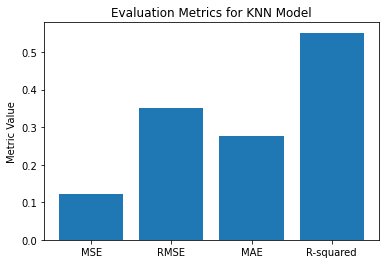

In [36]:
metrics = ['MSE', 'RMSE', 'MAE', 'R-squared']
values = [mseknn, rmseknn, maeknn, r2knn]
plt.bar(metrics, values)
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics for KNN Model')
plt.show()